## 차원 축소
* 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것
* 차원이 증가할 수록 데이터 포인트 간의 거리가 기하급수적으로 멀어지게 되고 희소한 구조를 가지며 예측 신뢰도가 떨어짐
* 선형 모델에서는 입력 변수 간의 상관관계가 높을 경우 다중 공선성 문제로 모델의 예측 성능 저하
* 다차원의 피처를 차원 축소해 피처 수를 줄이면 더 직관적으로 데이터를 해석할 수 있음
* 차원 축소는 피처 선택과 피처 추출로 나눌 수 있음
* 피처 선택은 특정 피처에 종속성이 강한 불필요한 피처는 제거하고 데이터의 특징을 잘 나타내는 주요 피처만 선택
* 피처 추출은 기존 피처를 저차원의 중요 피처로 압축해서 추출. 기존의 피처가 압축된 것이므로 기존 피처와는 다른 값이 됨
* 차원 축소를 통해 좀 더 데이터를 잘 설명할 수 있는 잠재적인 요소를 추출하며 PCA, SVD, NMF은 대표적인 차원 축소 알고리즘

입력 데이터의 공분산 행렬을 고유벡터와 고유값으로 분해하는 과정은 선형 대수학의 핵심 개념 중 하나이며, 주성분 분석(PCA) 같은 데이터 분석 기법에서 자주 사용됩니다. 이러한 과정을 이해하려면, 우선 공분산 행렬, 고유벡터, 고유값이 무엇인지 이해해야 합니다.


- 행렬을 사용하여 변환(스케일링, 회전 등)을 수행할 수 있습니다. 이 변환 과정에서 변환된 결과가 원래 벡터의 스칼라 배만큼 변하는 벡터가 있을 수 있는데, 이를 '고유벡터'라고 합니다. 즉, 행렬에 의한 변환을 받아도 방향이 바뀌지 않고 크기만 변하는 벡터를 고유벡터라고 합니다.

- 이때 그 벡터가 얼마나 스케일링되는지, 즉 얼마나 크기가 변하는지를 나타내는 스칼라 값을 '고유값'이라고 합니다.

- 위의 설명을 수식 Ax = λx로 매핑해볼 수 있습니다. 여기서 A는 변환을 나타내는 행렬, x는 고유벡터, λ는 고유값입니다. 이 수식은 "행렬 A에 의해 벡터 x가 변환되면, 그 결과는 원래의 벡터 x의 λ배만큼 크기가 변한 벡터"라는 의미를 가지고 있습니다.

- 고유벡터와 고유값을 찾는 것은, 주어진 행렬의 변환에 대하여 방향은 유지하면서 크기만 변하는 벡터와 그 변화의 크기를 찾는 것입니다.

#### 선형대수식
* 크기와 방향을 가지고 있는 것을 vector, 반면 크기만 있는 것(질량, 온도, 길이)을 scalar이라고 한다
* 고유벡터 : 행렬 A를 곱하더라도 방향이 변하지 않고 그 크기만 변하는 벡터 Ax = ax(A 행렬, x 고유벡터, a 스칼라)
* 고유값(Eigenvalue) : 고유 벡터의 크기. 입력데이터의 분산
* 선형 변환 : 특정 벡터에 행렬  A를 곱해 새로운 벡터로 변환
* 공분산 행렬 : 두변수간의 변동을 의미. 공분산 Cov(X,Y) > 0 은 X가 증가할 때 Y도 증가
* 대칭행렬 : 고유벡터를 항상 직교행렬로 고유값을 정방 행렬로 대각화할 수 있음
* 직교행렬 : 대각원소 이외의 모든 원소가 0일때. 직교행렬의 역행렬은 직교행렬 자신의 전치행렬과 같음

In [3]:
# 대칭행렬(Symmetric Matrix)은 그 이름에서 알 수 있듯이, 대각선을 기준으로 각 원소가 대칭적으로 
# 배치된 행렬. 즉, 행렬의 i행 j열 원소와 j행 i열 원소가 동일한 경우, 이 행렬은 대칭행렬
import numpy as np

A = np.array([[1, 2, 3], [2, 4, 5], [3, 5, 6]])
print(A)

[[1 2 3]
 [2 4 5]
 [3 5 6]]


In [4]:
# 직교행렬(Orthogonal Matrix)은 그 자신과 자신의 전치행렬(행과 열이 바뀐 행렬)을 곱하면 
# 단위행렬(대각선 원소만 1이고 나머지 원소는 모두 0인 행렬)이 되는 행렬. 이는 행렬의 모든 행 벡터들이 
# 서로 직교(즉, 내적이 0)하고, 각 행 벡터의 크기가 1이라는 것을 의미합니다. 이러한 성질로 인해 직교행렬의 
# 역행렬은 그 자신의 전치행렬과 같다.

O = np.array([[1,0],[0,1]])
print(O,'\n')
print(O.T,'\n')
print(np.dot(O, O.T),'\n')
O_inv = np.linalg.inv(O)
print(O_inv,'\n')

print(np.dot(O, O_inv))

[[1 0]
 [0 1]] 

[[1 0]
 [0 1]] 

[[1 0]
 [0 1]] 

[[1. 0.]
 [0. 1.]] 

[[1. 0.]
 [0. 1.]]


In [5]:
# Q. 역행렬 구하고 행렬x역행렬 = 단위행렬 검증하세요
import numpy as np

# 원래의 행렬 A 정의
A = np.array([[1, 2], [3, 4]])

# A의 역행렬을 구함
A_inv = np.linalg.inv(A)

print("행렬 A:")
print(A)

print("\n행렬 A의 역행렬:")
print(A_inv)

# 검증: A와 A의 역행렬을 곱하면 단위행렬이 나와야 함
print("\n검증: A와 A의 역행렬을 곱함:")
print(np.dot(A, A_inv))

행렬 A:
[[1 2]
 [3 4]]

행렬 A의 역행렬:
[[-2.   1. ]
 [ 1.5 -0.5]]

검증: A와 A의 역행렬을 곱함:
[[1.00000000e+00 1.11022302e-16]
 [0.00000000e+00 1.00000000e+00]]


In [6]:
# 대칭행렬은 그 자신의 전치행렬과 같은 행렬
import numpy as np

# 임의의 행렬 생성
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(A,'\n')
# 대칭행렬 생성
symmetric_matrix = (A + A.T) / 2
print(symmetric_matrix)

[[1 2 3]
 [4 5 6]
 [7 8 9]] 

[[1. 3. 5.]
 [3. 5. 7.]
 [5. 7. 9.]]


In [7]:
# 고유값과 고유벡터 계산
eigval, eigvec = np.linalg.eig(symmetric_matrix)

# 결과 출력
print("Eigenvalues:", eigval)
print("Eigenvectors:\n", eigvec)

Eigenvalues: [ 1.64582364e+01 -1.45823643e+00  8.30056137e-16]
Eigenvectors:
 [[-0.35162514 -0.84243284  0.40824829]
 [-0.55335618 -0.1647127  -0.81649658]
 [-0.75508721  0.51300744  0.40824829]]


#### 행렬 분해
- 공분산 행렬은 여러 변수간의 공분산을 행렬 형태로 나타낸 것입니다. 대각선 원소는 각 변수의 분산을 나타내고, 비대각선 원소는 서로 다른 두 변수간의 공분산을 나타냅니다.
- 공분산 행렬을 고유벡터와 고유값으로 분해하는 과정은 대략적으로 다음과 같습니다.

    - 입력 데이터로부터 공분산 행렬을 계산합니다.
    - 계산된 공분산 행렬에 대해 고유값과 고유벡터를 찾습니다. 이를 위해 보통 행렬 대수학에서 사용하는 기법들을 활용합니다.
    - 고유값을 내림차순으로 정렬하고, 해당 고유값에 대응되는 고유벡터도 같은 순서로 정렬합니다. 이 때, 각 고유벡터는 서로 직교(orthogonal)합니다.
    - 최종적으로 고유값과 고유벡터는 원래의 공분산 행렬을 재구성하는 데 사용됩니다.

이 과정을 통해, 데이터의 공분산 행렬은 그 행렬을 이루는 벡터공간에 대한 정보, 즉, 고유벡터(방향)와 고유값(크기)을 추출할 수 있게 됩니다. 이는 데이터의 차원 축소, 노이즈 제거, 특성 추출 등 다양한 분석에 사용되는 기법입니다.

In [12]:
# 행 벡터들이 직교하면 내적은 0
import numpy as np

# 임의의 데이터 셋 생성
data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(data,'\n')

# 1. 공분산 행렬 계산
cov_mat = np.cov(data.T)  # np.cov는 각 변수(여기서는 각 열)의 쌍에 대한 공분산을 계산
print(cov_mat,'\n')

# 2. 고유값과 고유벡터 계산
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print(eig_vals,'\n')
print(eig_vecs,'\n')

# 3. 고유값 정렬 및 해당하는 고유벡터 매칭
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0],i[1])

# 각 고유벡터가 직교하는지 확인. 내적 0
print('\nOrthogonality check:')
print(np.dot(eig_vecs[:,0], eig_vecs[:,1]))


[[1 2 3]
 [4 5 6]
 [7 8 9]] 

[[9. 9. 9.]
 [9. 9. 9.]
 [9. 9. 9.]] 

[ 2.70000000e+01 -2.05116020e-15  1.76986475e-32] 

[[-5.77350269e-01  8.04908467e-01  1.09446620e-16]
 [-5.77350269e-01 -5.21162995e-01  7.07106781e-01]
 [-5.77350269e-01 -2.83745472e-01 -7.07106781e-01]] 

Eigenvalues in descending order:
27.0 [-0.57735027 -0.57735027 -0.57735027]
2.0511601988091347e-15 [ 0.80490847 -0.521163   -0.28374547]
1.7698647479449906e-32 [ 1.09446620e-16  7.07106781e-01 -7.07106781e-01]

Orthogonality check:
2.7755575615628914e-16


In [8]:
import numpy as np

# 임의의 행렬 생성
A = np.array([[4, 2], [1, 3]])

# 고유값과 고유벡터 계산
# np.linalg.inv 함수는 행렬의 역행렬을 계산
eig_vals, eig_vecs = np.linalg.eig(A)

# 고유값을 대각행렬로 변환
eig_val_mat = np.diag(eig_vals)

# 복구 과정
# V * Λ * V^-1  (여기서 V는 고유벡터 행렬, Λ는 고유값 대각행렬)
A_reconstructed = eig_vecs @ eig_val_mat @ np.linalg.inv(eig_vecs)

print("Original matrix:")
print(A)

print("\nReconstructed matrix from eigendecomposition:")
print(A_reconstructed)


Original matrix:
[[4 2]
 [1 3]]

Reconstructed matrix from eigendecomposition:
[[4. 2.]
 [1. 3.]]


#### PCA
* 입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며 이렇게 분해된 고유벡터을 이용해 입력 데이터를 선형 변환하는 방식이 PCA
* 입력 데이터 세트의 공분산 행렬을 생성
* 공분산 행렬의 고유벡터와 고유값을 계산
* 고유값이 가장 큰 순으로 K개(PCA 변환 차수)만큼 고유벡터를 추출
* 고유값이 가장 큰 순으로 추출되며 고유벡터를 이용해 새롭게 입력 데이터을 변환

#### LDA(Linear Discriminant Analysis)
* PCA와 매우 유사한 방식이며 PCA가 입력 데이터 변동성의 가장 큰 축을 찾는데 반해 LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾는 방식으로 차원을 축소

#### SVD, NMF
* 매우 많은 피처 데이터를 가진 고차원 행렬을 두 개의 저차원 행렬로 분리하는 행렬 분해 기법.
* 행렬 분해를 수행하면서 원본 행렬에서 잠재된 요소를 추출하기 때문에 토픽 모델이나 추천 시스템에서 활발하게 사용 

In [9]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


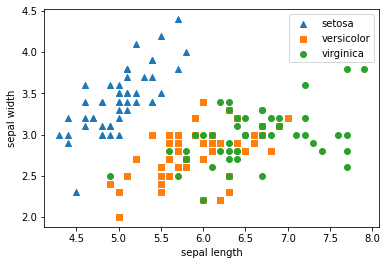

In [10]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용하여 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [14]:
# PCA 변환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


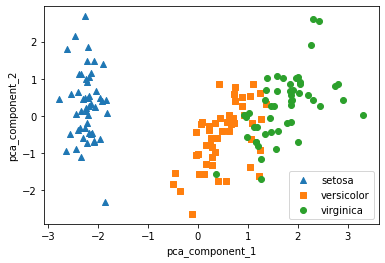

In [15]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [ ]:
print(pca.explained_variance_ratio_)

#### [과제] iris data 원본과 차원축소 데이터에 대하여 각각 모델링(rf) 및 평가(교차검증)한 후 결과를 비교하세요.